In [1]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping 
import matplotlib as plt
from keras.preprocessing.image import ImageDataGenerator 

# Gọi các thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Xử lý chuẩn hóa dữ liệu
from sklearn.model_selection import train_test_split # Chia dữ liệu ra làm 2 phần
from keras.layers import Dense, Activation, Dropout, BatchNormalization,LSTM # LSTM biên dạng ANN, BatchNormalization: cho nhỏ lại
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical # Sử dung để làm nổi đối tượng cần phân loại
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score # Để đo lường
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [2]:
# Preprocessing
train = ImageDataGenerator(rescale=1/255)
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                    directory="C:Desktop/AI/Nhan_Dien/",
                                                    shuffle=True,
                                                    target_size=(150,150), 
                                                    subset="training",
                                                    class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=32,
                                                        directory="C:Desktop/AI/Nhan_Dien/",
                                                        shuffle=True,
                                                        target_size=(150,150), 
                                                        subset="validation",
                                                        class_mode='categorical')


Found 1604 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [3]:
# X_train.shape, y_train.shape,X_test.shape,y_test.shape
train_dataset.classes
train_dataset.class_indices

{'Mat_Phai': 0, 'Mat_Trai': 1, 'Mieng': 2, 'Mui': 3}

In [4]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3), activation ='relu'  , kernel_initializer= 'he_uniform',  padding ='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), activation ='relu'))
model.add(Conv2D(32,(3,3), activation ='relu' , kernel_initializer= 'he_uniform',  padding ='same'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64,(3,3), activation ='relu'))
model.add(Conv2D(64,(3,3), activation ='relu' , kernel_initializer= 'he_uniform',  padding ='same'))

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model.add(Flatten())
model.add(Dense(512,activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [5]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'])

In [6]:
history=model.fit(train_dataset,batch_size=32,epochs=20,verbose=1,validation_data=validation_dataset)

Epoch 1/20
51/51 [==============================] - 67s 1s/step - loss: 0.5195 - accuracy: 0.7781 - val_loss: 4.5066e-05 - val_accuracy: 1.0000
Epoch 2/20
51/51 [==============================] - 68s 1s/step - loss: 0.0396 - accuracy: 0.9906 - val_loss: 0.0621 - val_accuracy: 0.9825
Epoch 3/20
51/51 [==============================] - 69s 1s/step - loss: 0.0351 - accuracy: 0.9944 - val_loss: 0.0189 - val_accuracy: 0.9875
Epoch 4/20
51/51 [==============================] - 77s 1s/step - loss: 0.3460 - accuracy: 0.9507 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 5/20
51/51 [==============================] - 75s 1s/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/20
51/51 [==============================] - 62s 1s/step - loss: 0.0154 - accuracy: 0.9944 - val_loss: 3.8369e-05 - val_accuracy: 1.0000
Epoch 7/20
51/51 [==============================] - 59s 1s/step - loss: 0.0026 - accuracy: 0.9988 - val_loss: 3.8812e-05 - val_accuracy: 1.0000
Epoch 8/

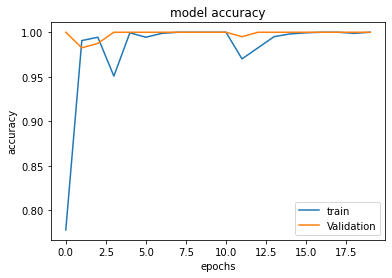

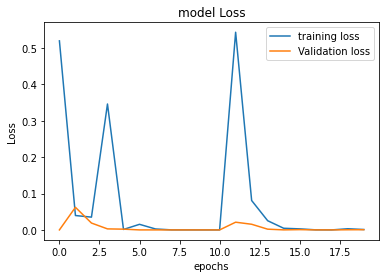

In [7]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['training loss','Validation loss'])
plt.show()

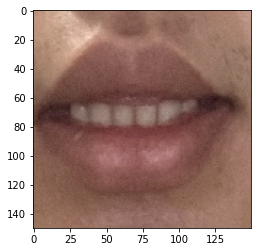

1/1 [==============================] - 0s 38ms/step
Mieng


In [14]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np 
filename = 'C:Desktop/AI/Test/z3512122036461_d1271547e6ca2e62e1c49d88f96f95c8.jpg'
img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Mat_Phai")
if(kq==1):
    print("Mat_Trai")
if(kq==3):
    print("Mui")
if(kq==2):
    print("Mieng")


In [65]:
#in sai so va do chinh xac
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  5.888736268389039e-06
Độ chính xác  1.0


In [66]:
# Save model
from tensorflow.keras.models import load_model
model.save('ND_cnn.h5')